## Observations and Insights

My first observation comes from the last section of code that refers to mouse weight and average tumor volume. The linear regression and correlation calculations show that there is a significant positive correlation between these two variables. It shows that as the tumor volume increases, we expect to find that the weight has also increased.

Second, it is clear from the boxplots that two of the drugs have a much larger spread of final tumor volume than the other two. Mice were removed early from the study, and their data was recorded with their last measured tumor volume as their final volume. This could skew the data if too many mice were removed early.

Finally, it seems that two of the drugs were extremely effective while the other two were ineffective. Things to keep in mind with this observation:  
- boxplot only shows final tumor volume and does not take into account other variables
    - We see a correlation with weight and average tumor volume, so we would have to ensure that the mice across the drug regimen were of similar weight
- We do not look into how the age of the mice affects tumor volume.

In [1]:


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from outlier_function import outlier

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results
# Combine the data into a single dataset
complete_df = pd.merge(study_results, mouse_metadata, on ='Mouse ID', how = 'left')
# Display the data table for preview
complete_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(complete_df['Mouse ID'].unique())


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
count=complete_df.groupby(['Mouse ID', 'Timepoint']).count()
dup_mouse_count = count.loc[count['Drug Regimen']>1, :]
dup_mouse_count = dup_mouse_count.reset_index()
dup_mouse_count


# clean_complete_df = complete_df.drop_duplicates(['Mouse ID', 'Timepoint'], keep= False)
# clean_complete_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,g989,0,2,2,2,2,2,2
1,g989,5,2,2,2,2,2,2
2,g989,10,2,2,2,2,2,2
3,g989,15,2,2,2,2,2,2
4,g989,20,2,2,2,2,2,2


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

dup_mouse = complete_df.loc[complete_df['Mouse ID'] == dup_mouse_count['Mouse ID'][0]]
dup_mouse


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.
complete_df=complete_df.set_index('Mouse ID')
clean_complete_df= complete_df.drop(index = dup_mouse_count['Mouse ID'][0], errors = 'ignore')
complete_df = complete_df.reset_index()

clean_complete_df=clean_complete_df.reset_index()

clean_complete_df.loc[clean_complete_df['Mouse ID'] =='c326']




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
29,c326,0,45.000000,0,Infubinol,Female,18,25
416,c326,5,36.321346,0,Infubinol,Female,18,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_complete_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
drug_group = clean_complete_df.groupby('Drug Regimen')
regimen_summary_df = drug_group['Tumor Volume (mm3)'].describe()
regimen_summary_df['Variance'] = drug_group['Tumor Volume (mm3)'].var()
regimen_summary_df['SEM']=drug_group['Tumor Volume (mm3)'].sem()
regimen_summary_df = regimen_summary_df.drop(columns = ['25%', '75%', 'max', 'min', 'count'])
regimen_summary_df = regimen_summary_df.rename(columns = {'mean':'Mean',
                                    'std':'Standard Deviation',
                                    '50%':'Median'})
regimen_summary_df.style.format({'Mean':'{0:,.2f}',
                                 'Median':'{0:,.2f}',
                                 'Variance':'{0:,.2f}',
                                 'Standard Deviation':'{0:,.2f}',
                                 'SEM':'{0:,.2f}'})

,Mean,Standard Deviation,Median,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.68,4.99,41.56,24.95,0.33
Ceftamin,52.59,6.27,51.78,39.29,0.47
Infubinol,52.88,6.57,51.82,43.13,0.49
Ketapril,55.24,8.28,53.70,68.55,0.60
Naftisol,54.33,8.13,52.51,66.17,0.60
Placebo,54.03,7.82,52.29,61.17,0.58
Propriva,52.32,6.62,50.45,43.85,0.54
Ramicane,40.22,4.85,40.67,23.49,0.32
Stelasyn,54.23,7.71,52.43,59.45,0.57


## Bar and Pie Charts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

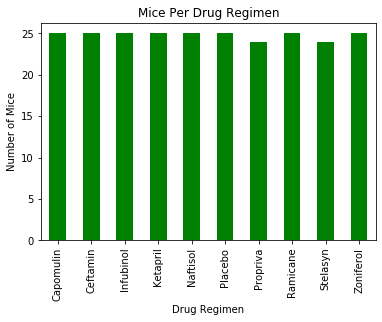

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_per_regimen = drug_group['Mouse ID'].unique()
mouse_per_regimen = mouse_per_regimen.reset_index()
unique_counts = {'Number of Mice':[len(d) for d in mouse_per_regimen['Mouse ID']]}
unique_counts=pd.DataFrame(unique_counts)

unique_counts = unique_counts.set_index(mouse_per_regimen['Drug Regimen'])
mpr_chart = unique_counts.plot(kind = 'bar', facecolor='green', legend=False)
mpr_chart.set_title('Mice Per Drug Regimen')
mpr_chart.set_ylabel('Number of Mice')


unique_counts = unique_counts.reset_index()
clean_complete_df['Drug Regimen'].value_counts()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

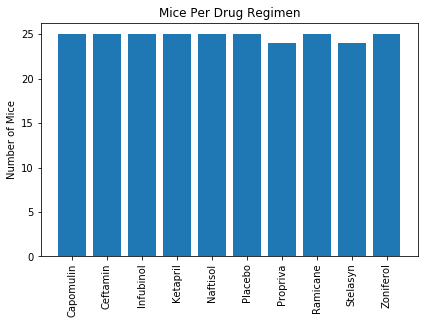

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(unique_counts['Drug Regimen'], unique_counts['Number of Mice'])
plt.title('Mice Per Drug Regimen')
plt.ylabel('Number of Mice')
plt.tight_layout()
plt.xticks(rotation=90)



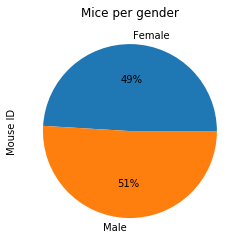

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_complete_df.groupby('Sex')
gender_count = gender_group['Mouse ID'].count()
gender_piechart = gender_count.plot(kind='pie', title = 'Mice per gender', autopct='%1.0f%%')
gender_count=gender_count.reset_index()


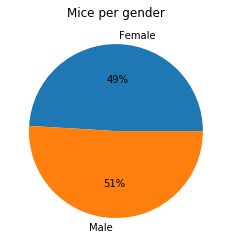

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count=pd.DataFrame(gender_count)
plt.pie(gender_count['Mouse ID'], labels=gender_count['Sex'], autopct='%1.0f%%')
plt.title('Mice per gender')
plt.show()




## Quartiles, Outliers and Boxplots

In [12]:
#Grabbing only last times

last_time_df = clean_complete_df.groupby('Mouse ID')['Timepoint'].max()
last_time_df = last_time_df.reset_index()
#dataframe of specific drug regimen. was getting an error when I tried to use the | operator 
#when in the .loc. so i just split into different dfs 
# cap = last_time_df[['Drug Regimen','Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']].loc[last_time_df['Drug Regimen']=='Capomulin']
# ram = last_time_df[['Drug Regimen','Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']].loc[last_time_df['Drug Regimen']=='Ramicane']
# inf = last_time_df[['Drug Regimen','Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']].loc[last_time_df['Drug Regimen']=='Infubinol']
# ceft = last_time_df[['Drug Regimen','Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']].loc[last_time_df['Drug Regimen']=='Ceftamin']
# last_time_df.loc[(last_time_df['Timepoint'].max()) & (last_time_df['Drug Regimen'] == 'Infubinol'), 'Tumor Volume (mm3)']

merged_data = pd.merge(last_time_df, clean_complete_df, on=['Mouse ID', 'Timepoint'])
merged_data
cap = merged_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']].loc[merged_data['Drug Regimen']=='Capomulin']
ram = merged_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']].loc[merged_data['Drug Regimen']=='Ramicane']
inf = merged_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']].loc[merged_data['Drug Regimen']=='Infubinol']
ceft = merged_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']].loc[merged_data['Drug Regimen']=='Ceftamin']


In [20]:


#Created and Imported my own function to calculate outliers and relevant information.
#Function accepts a series as its parameter
#Funciton returns dictionary with; Lower Bound, Upper Bound, Mean, Median, Mode, IQR, and Potential Outlier Index Positions in a list
outlier_output_df = pd.DataFrame({'Capomulin':(outlier(cap['Tumor Volume (mm3)'])),
              'Ramicane':(outlier(ram['Tumor Volume (mm3)'])),
              'Infubinol': (outlier(inf['Tumor Volume (mm3)'])),
              'Ceftamin': (outlier(ceft['Tumor Volume (mm3)']))})
outlier_output_df




,Capomulin,Ramicane,Infubinol,Ceftamin
Mean,36.6676,36.1914,58.1782,57.754
Mode,0 23.343598 1 28.430964 2 28.48403...,0 22.050126 1 29.128472 2 30.27623...,0 36.321346 1 45.699331 2 46.25011...,0 45.0 dtype: float64
Lower Bound,20.7046,17.9127,36.8329,25.3554
Upper Bound,51.832,54.3068,82.7414,87.6665
Median,38.1252,36.5617,60.1652,59.852
IQR,7.78186,9.09854,11.4771,15.5778
Potential Outliers,[],[],[5],[]


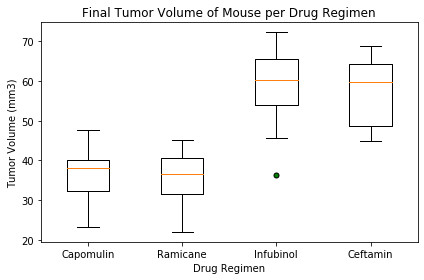

In [21]:
#Using a dictionary of lists to get boxplots on same plot.
chart_data = {'Capomulin' : cap['Tumor Volume (mm3)'],
              'Ramicane' : ram['Tumor Volume (mm3)'],
              'Infubinol' : inf['Tumor Volume (mm3)'],
              'Ceftamin' : ceft['Tumor Volume (mm3)']}
fliers = dict(marker='o', markerfacecolor='g', markersize=5, linestyle='none')
box = plt.figure().subplots()
box.boxplot(chart_data.values(), labels = chart_data.keys(), flierprops=fliers)
plt.title('Final Tumor Volume of Mouse per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.tight_layout()
plt.show()
# Capomulin, Ramicane, Infubinol, and Ceftamin


## Line and Scatter Plots

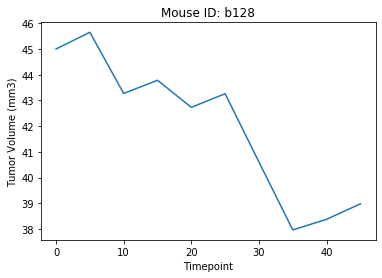

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin\
mouse_id = 'b128' #using variable to make chart dynamic for different mice 
mouse = clean_complete_df.loc[clean_complete_df['Mouse ID']==mouse_id]
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Mouse ID: {mouse_id}')
plt.show()


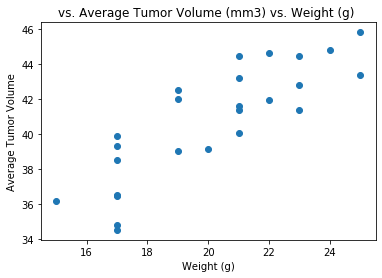

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
tot_cap = clean_complete_df.loc[clean_complete_df['Drug Regimen'] == 'Capomulin']
avg_mouse_group = tot_cap.groupby('Mouse ID').mean()
plt.scatter(avg_mouse_group['Weight (g)'], avg_mouse_group['Tumor Volume (mm3)']) #since the weight doesnt change we can use the .mean() values for plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title('vs. Average Tumor Volume (mm3) vs. Weight (g) ')
plt.show()


## Correlation and Regression

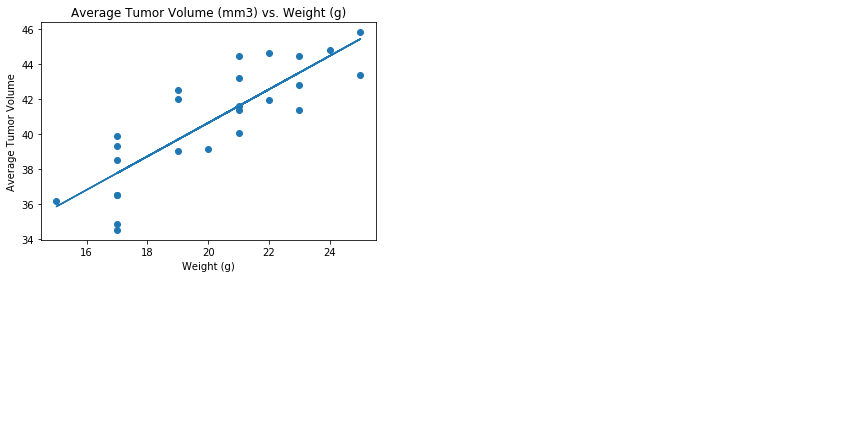

Rvalue: 0.84
PValue: 1.3e-07


In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = avg_mouse_group['Weight (g)']
y_values = avg_mouse_group['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
tumor_values_regress = [(slope*x)+intercept for x in x_values]
tumor_values_regress
plt.scatter(avg_mouse_group['Weight (g)'], avg_mouse_group['Tumor Volume (mm3)']) #since the weight doesnt change we can use the .mean() values for plot
plt.plot(x_values, tumor_values_regress)
equation = f'{slope:.2f}x + {intercept:.2f}'
plt.annotate(f'Line: {equation}', (36,24), fontsize = 15, color = 'green')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title('Average Tumor Volume (mm3) vs. Weight (g)')
plt.show()
print(f'Rvalue: {round(rvalue, 2)}\nPValue: {round(pvalue, 8)}')